In [1]:
import pandas as pd
#import seaborn as sns
#import scipy
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import random
# import pybel
# from __future__ import division

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Lipinski import NumHDonors, NumHAcceptors, NumAromaticRings
import rdkit.Chem as Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Crippen import MolLogP
# from SA_Score.sascorer import scoreMolecules
from mol2vec.mol2vec.smilestovector import smilesToVec 
from gensim.models import word2vec

import sys
sys.path.append('../')

import csv
import torch

In [2]:
cnsmpo_model_relu = torch.nn.Sequential(
          torch.nn.Linear(300, 256),
          torch.nn.ReLU6(),
          torch.nn.Linear(256, 256),
          torch.nn.ReLU6(),
          torch.nn.Linear(256, 32),
          torch.nn.ReLU6(),
          torch.nn.Linear(32, 1),
          torch.nn.ReLU6()
        )
cnsmpo_model_relu.load_state_dict(torch.load("Pytorch-Models/cnsmpo-model/cnsmpo_model.pt"))
cnsmpo_model_relu.eval()

cnsmpo_model_no_relu = torch.nn.Sequential(
          torch.nn.Linear(300, 256),
          torch.nn.Linear(256, 128),
          torch.nn.Linear(128, 64),
          torch.nn.Linear(64, 32),
          torch.nn.Linear(32, 16),
          torch.nn.Linear(16, 8),
          torch.nn.Linear(8, 1),
        )
cnsmpo_model_no_relu.load_state_dict(torch.load("Pytorch-Models/cnsmpo-model/Archive/cnsmpo_model_before_relu.pt"))
cnsmpo_model_no_relu.eval()


Sequential(
  (0): Linear(in_features=300, out_features=256, bias=True)
  (1): Linear(in_features=256, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): Linear(in_features=16, out_features=8, bias=True)
  (6): Linear(in_features=8, out_features=1, bias=True)
)

In [3]:
vina_model_relu = torch.nn.Sequential(
          torch.nn.Linear(300, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 32),
          torch.nn.ReLU(),
          torch.nn.Linear(32, 1),
          torch.nn.Sigmoid()
        )
vina_model_relu.load_state_dict(torch.load("Pytorch-Models/vina-model/vina_model.pt"))
vina_model_relu.eval()

vina_model_no_relu = torch.nn.Sequential(
          torch.nn.Linear(300, 256),
          torch.nn.Linear(256, 128),
          torch.nn.Linear(128, 64),
          torch.nn.Linear(64, 32),
          torch.nn.Linear(32, 16),
          torch.nn.Linear(16, 8),
          torch.nn.Linear(8, 1),
        )
vina_model_no_relu.load_state_dict(torch.load("Pytorch-Models/vina-model/Archive/vina_model_before_activation.pt"))
vina_model_no_relu.eval()

Sequential(
  (0): Linear(in_features=300, out_features=256, bias=True)
  (1): Linear(in_features=256, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): Linear(in_features=16, out_features=8, bias=True)
  (6): Linear(in_features=8, out_features=1, bias=True)
)

In [4]:
with open('cleaned_data.txt') as f:
    lines = f.readlines()

CNSMPO = [x.split(",")[2] for x in lines]
CNSMPO.pop(0)
CNSMPO = [float(x) for x in CNSMPO]

VINA = [x.split(",")[1] for x in lines]
VINA.pop(0)
VINA = [float(x) for x in VINA]

with open('vectors.txt') as f:
    vectors = f.readlines()

vectors = [v.split() for v in vectors]

for i, v in enumerate(vectors):
    vectors[i] = [float(x) for x in v]



# CNSMPO = [i/6 for i in CNSMPO]

print(len(CNSMPO), CNSMPO[0])

print(len(VINA), VINA[0])

print(len(vectors), vectors[0])

8231 5.833333333333332
8231 -4.1
8231 [-0.8134841, -0.05821444, -3.1091762, -1.521723, 2.099454, -0.6462783, -3.5303845, -1.3812082, 2.6566944, -1.064867, 0.38034844, 2.0163476, -0.5487292, 1.7855556, -2.7250235, 0.36735967, 3.5925133, -3.4444723, -4.143732, 3.0507214, -0.039031997, 2.655145, 7.850331, 1.6854944, -0.9055666, 2.2642906, -2.25237, -3.4570339, 0.48298407, -0.99808973, 1.827291, -1.5188519, -2.7914402, -0.24624938, -0.80395997, 0.37307924, 0.17979059, 0.028647542, 2.8683753, 1.4372865, 0.48758474, 1.7694497, -1.4639603, -1.5272025, -2.450976, 2.445017, 1.0313449, 5.356881, -1.760844, 0.47067806, 2.1746936, -4.099659, 1.5249482, -3.6890988, -3.8183537, -4.9644566, 0.26554787, 1.3221192, 0.32392606, 0.9394232, -0.5306274, 0.82102376, -1.9548535, 1.8759416, -6.1560864, 1.0693748, 2.4478695, 0.7963313, -4.0167546, -1.2147425, -0.2772097, 3.0007439, 1.9089986, -5.6112957, -0.7103334, 3.0799408, -4.702974, -0.72712636, 0.05071208, 0.14640754, 3.157611, -0.9876916, 1.6242783, -4.

In [5]:
predicted_cnsmpo_relu = []
predicted_cnsmpo_no_relu = []
predicted_vina_relu = []
predicted_vina_no_relu = []


for v in vectors:
    predicted_cnsmpo_relu.append(float(cnsmpo_model_relu(torch.Tensor(v)).detach().numpy()))
    predicted_cnsmpo_no_relu.append(float(cnsmpo_model_no_relu(torch.Tensor(v)).detach().numpy()))
    predicted_vina_relu.append(float(vina_model_relu(torch.Tensor(v)).detach().numpy()))
    predicted_vina_no_relu.append(float(vina_model_no_relu(torch.Tensor(v)).detach().numpy()))

0.45731893291336334 0.05816322863665191


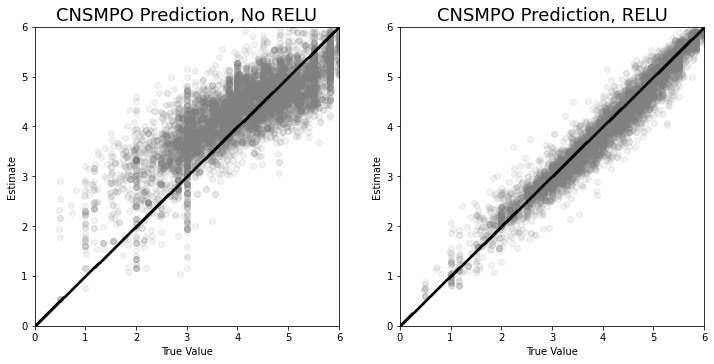

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.5))

axs[0].scatter(CNSMPO, predicted_cnsmpo_no_relu, color="grey", alpha=0.1)
axs[0].set_xlabel("True Value")
axs[0].set_ylabel("Estimate")
axs[0].set_title("CNSMPO Prediction, No RELU", fontsize=18 )

line = np.arange(0, 6, 0.01)

axs[0].scatter(line, line, color="black", s=2)
axs[0].set_xlim([0, 6])
axs[0].set_ylim([0, 6])


axs[1].scatter(CNSMPO, predicted_cnsmpo_relu, color="grey", alpha=0.1)
axs[1].set_xlabel("True Value")
axs[1].set_ylabel("Estimate")
axs[1].set_title("CNSMPO Prediction, RELU", fontsize=18 )

line = np.arange(0, 6, 0.01)

axs[1].scatter(line, line, color="black", s=2)
axs[1].set_xlim([0, 6])
axs[1].set_ylim([0, 6])

sum_relu = 0
for i, x in enumerate(predicted_cnsmpo_relu):
    sum_relu += (float(x) - CNSMPO[i]) ** 2
sum_relu = sum_relu / len(CNSMPO)

sum_no_relu = 0
for i, x in enumerate(predicted_cnsmpo_no_relu):
    sum_no_relu += (x - CNSMPO[i]) ** 2
sum_no_relu = sum_no_relu / len(CNSMPO)

print(sum_no_relu, sum_relu)

0.8439769440090826 0.30706411317394255


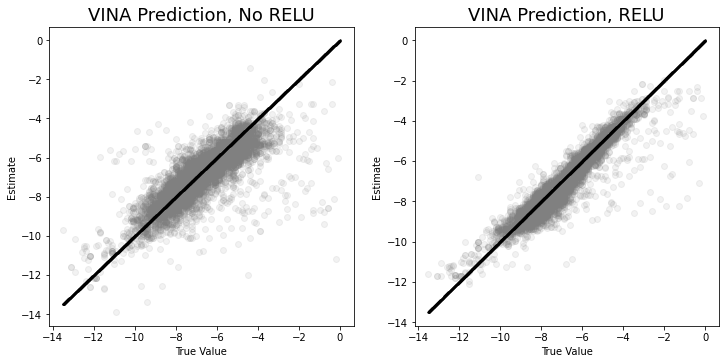

In [13]:
# predicted_vina_no_relu_13 = [x*-13.5 for x in predicted_vina_no_relu]
predicted_vina_relu_13 = [x*-13.5 for x in predicted_vina_relu]


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.5))

axs[0].scatter(VINA, predicted_vina_no_relu, color="grey", alpha=0.1)
axs[0].set_xlabel("True Value")
axs[0].set_ylabel("Estimate")
axs[0].set_title("VINA Prediction, No RELU", fontsize=18 )

line = np.arange(-13.5, 0, 0.01)

axs[0].scatter(line, line, color="black", s=2)
# axs[0].set_xlim([-13.5, 0])
# axs[0].set_ylim([-13.5, 0])


axs[1].scatter(VINA, predicted_vina_relu_13, color="grey", alpha=0.1)
axs[1].set_xlabel("True Value")
axs[1].set_ylabel("Estimate")
axs[1].set_title("VINA Prediction, RELU", fontsize=18 )

line = np.arange(-13.5, 0, 0.01)

axs[1].scatter(line, line, color="black", s=2)
# axs[1].set_xlim([-13.5, 0])
# axs[1].set_ylim([-13.5, 0])
sum_relu = 0
for i, x in enumerate(predicted_vina_relu):
    sum_relu += (float(x)*-13.5 - VINA[i]) ** 2
sum_relu = sum_relu / len(VINA)

sum_no_relu = 0
for i, x in enumerate(predicted_vina_no_relu):
    sum_no_relu += (x - VINA[i]) ** 2
sum_no_relu = sum_no_relu / len(VINA)

print(sum_no_relu, sum_relu)